In [51]:
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from utils import shuffle_batch, variable_summaries
import os

%matplotlib notebook

dir_path = os.getcwd()

now = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
print(dir_path)
print(now)

C:\Users\kicjo\Desktop\my-anns\nuclei-updated-dataset
2019-08-14-14-06-29


In [2]:
df = pd.read_csv("better-nuclei.csv")
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 5 columns):
Z                    3436 non-null int64
N                    3436 non-null int64
Mass Excess [MeV]    3436 non-null float64
Error                3436 non-null float64
Estimated            3436 non-null int64
dtypes: float64(2), int64(3)
memory usage: 134.3 KB
None


Index(['Z', 'N', 'Mass Excess [MeV]', 'Error', 'Estimated'], dtype='object')

In [3]:
df = df.rename(columns={"Mass Excess [MeV]": "d", "Z":'z', 'N':'n',"Error":"error", "Estimated":"estimated"})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 5 columns):
z            3436 non-null int64
n            3436 non-null int64
d            3436 non-null float64
error        3436 non-null float64
estimated    3436 non-null int64
dtypes: float64(2), int64(3)
memory usage: 134.3 KB
None


In [4]:
not_estimated_filter = (df["estimated"] == 0)
df = df[not_estimated_filter]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 5 columns):
z            2498 non-null int64
n            2498 non-null int64
d            2498 non-null float64
error        2498 non-null float64
estimated    2498 non-null int64
dtypes: float64(2), int64(3)
memory usage: 117.1 KB


In [6]:
df.isnull().values.any()

False

In [7]:
df['z'].shape

(2498,)

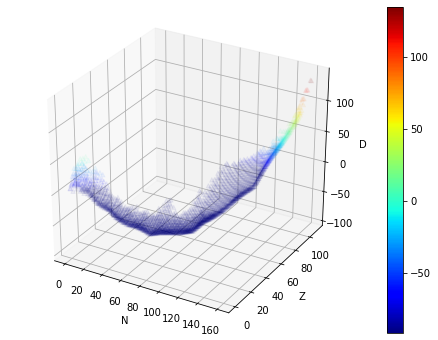

In [8]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = df['n']
ys = df['z']
zs = df['d']

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.05)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

2498


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


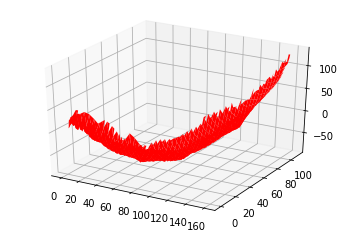

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

data = list(zip(df['n'],df['z'],df['d']))
print(len(data))
x, y, z = zip(*data)
zs = list(df['d'].to_numpy())

z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.hsv)
plt.show()

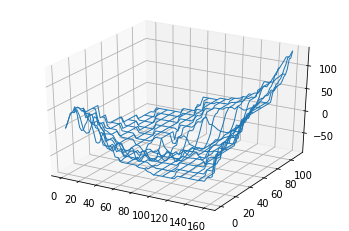

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.interpolate import griddata

x= df['n'].to_numpy()
y= df['z'].to_numpy()
z= df['d'].to_numpy()
fig = plt.figure()
ax = fig.gca(projection='3d')
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='nearest')    # create a uniform spaced grid
xig, yig = np.meshgrid(xi, yi)
surf = ax.plot_wireframe(X=xig, Y=yig, Z=zi, rstride=5, cstride=3, linewidth=1,cmap=plt.cm.hsv)   # 3d plot
plt.show()

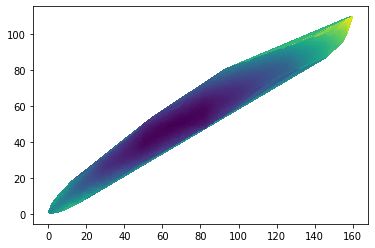

In [11]:
fig, (ax)=plt.subplots(ncols=1)
ax.tripcolor(df["n"], df["z"], df["d"])
#ax2.set_title("tricontour")
#ax2.tricontourf(df["n"], df["z"], df["d"])

plt.show()

In [12]:
x = df.drop(['d',"error","estimated"], axis='columns')
print(x.info())
x = x.to_numpy()
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 2 columns):
z    2498 non-null int64
n    2498 non-null int64
dtypes: int64(2)
memory usage: 58.5 KB
None
(2498, 2)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 5 columns):
z            2498 non-null int64
n            2498 non-null int64
d            2498 non-null float64
error        2498 non-null float64
estimated    2498 non-null int64
dtypes: float64(2), int64(3)
memory usage: 117.1 KB


In [14]:
y = df['d'].to_numpy()
y = y.reshape(-1,1)
y.shape

(2498, 1)

In [15]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(x, y, test_size=0.2, random_state=1)
X_train_o, X_val_o, y_train_o, y_val_o  = train_test_split(X_train_o, y_train_o, test_size=0.2, random_state=1)
n_inputs = X_train_o.shape[1]
n_outputs = y_train_o.shape[1]
print(n_inputs)
print(n_outputs)

2
1


In [16]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = x_scaler.fit_transform(X_train_o.reshape(-1, n_inputs))
X_test = x_scaler.transform(X_test_o.reshape(-1, n_inputs))
X_val = x_scaler.transform(X_val_o.reshape(-1, n_inputs))

y_train = y_scaler.fit_transform(y_train_o.reshape(-1, n_outputs))
y_test = y_scaler.transform(y_test_o.reshape(-1, n_outputs))
y_val = y_scaler.transform(y_val_o.reshape(-1, n_outputs))

n_inputs = X_train.shape[1]
n_outputs = y_train.shape[1]
print(n_inputs)
print(n_outputs)

2
1


In [17]:
def cust_layer(inputs,number_of_neurons, name, activation=None, dropout=False):
    init = tf.initializers.he_normal(seed=None)
    hidden = tf.keras.layers.Dense(number_of_neurons,
                                   name=name,
                                    kernel_initializer=init,
                                   activation = activation,
                                   kernel_regularizer = tf.keras.regularizers.l2(l=0.1)
                                  )(inputs)
    
    batch_norm = tf.keras.layers.BatchNormalization()(hidden, training=True)
    
    if dropout:
        dropout_layer = tf.keras.layers.Dropout(0.5)(batch_norm)
        return dropout_layer
    else:
        return batch_norm
    
tf.reset_default_graph()
with tf.name_scope("dnn"):
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.float32, shape=(None, n_outputs), name="y")
    
    init = tf.initializers.he_normal(seed=None)    
    hidden1 = tf.keras.layers.Dense(20, name="hidden1",
                                    kernel_initializer=init)(X)    
    batch_norm_1 = tf.keras.layers.BatchNormalization()(hidden1, training=True)    
    dropout1 = tf.keras.layers.Dropout(0.5)(batch_norm_1)
        
    
    last_layer = cust_layer(X,20,"hidden1")
    
    n_layers = 5
    
    for i in range(n_layers):
        is_odd = False
            
        last_layer = cust_layer(last_layer,50,"hidden"+str(i),activation=tf.nn.elu,dropout=True)
   
    
    y_pred = tf.keras.layers.Dense(1, name="output",
                                   kernel_initializer=init)(last_layer)

with tf.name_scope('MSE'):
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")
    variable_summaries(mse)


with tf.name_scope('optimiser'):
    optimiser = tf.train.AdamOptimizer(0.01)
    training_op = optimiser.minimize(mse)

for var in tf.trainable_variables():
    tf.summary.histogram(var.name, var)

W0814 13:52:06.917925 18920 deprecation_wrapper.py:119] From C:\Users\kicjo\Desktop\my-anns\nuclei-updated-dataset\utils.py:16: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0814 13:52:06.933850 18920 deprecation_wrapper.py:119] From C:\Users\kicjo\Desktop\my-anns\nuclei-updated-dataset\utils.py:22: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.



In [18]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())
test_writer = tf.summary.FileWriter(logdir + '/test')
valid_writer = tf.summary.FileWriter(logdir + '/valid')
init = tf.global_variables_initializer()

saver = tf.train.Saver()

checkpoint_path = os.path.join(dir_path, "sinus_tmp","sinus_full_model.ckpt")
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = os.path.join(dir_path, "model", "my_sinus_full_model")

In [19]:
n_epochs = 6000
n_batches = 50

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = n_epochs * 0.4
print(max_epochs_without_progress)



2400.0


In [20]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, n_batches):
            summary, _ = sess.run([merged, training_op],
                                  feed_dict={X: X_batch, y: y_batch})

        train_summary, _ = sess.run([merged, training_op],feed_dict={X: X_train, y: y_train})
        test_summary, _ =sess.run([merged, training_op],feed_dict={X: X_test, y: y_test})
        validation_summary, _ = sess.run([merged, training_op], feed_dict={X: X_val, y: y_val})

        train_writer.add_summary(train_summary, epoch)
        test_writer.add_summary(test_summary, epoch)
        valid_writer.add_summary(validation_summary,epoch)

        loss_train = mse.eval(feed_dict={X: X_train, y: y_train})
        loss_val = mse.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "train loss:", loss_train, "valid loss:", loss_val)

        iteration_skip = 10
        if epoch % iteration_skip == 0:
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

        if loss_val < best_loss:
            saver.save(sess, final_model_path)
            best_loss = loss_val
            print("best loss:", best_loss)
        else:
            epochs_without_progress += 1
            if epochs_without_progress > max_epochs_without_progress:
                print("Early stopping")
                break


train_writer.close()
test_writer.close()
valid_writer.close()

W0814 13:52:08.819628 18920 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Training was interrupted. Continuing at epoch 161
161 train loss: 0.0070691844 valid loss: 0.012558384
best loss: 0.012558384
162 train loss: 0.010145049 valid loss: 0.009100159
best loss: 0.009100159
163 train loss: 0.009900005 valid loss: 0.007852435
best loss: 0.007852435
164 train loss: 0.0088670645 valid loss: 0.01713674
165 train loss: 0.009675564 valid loss: 0.015612755
166 train loss: 0.007819228 valid loss: 0.011287243
167 train loss: 0.012431127 valid loss: 0.019888666
168 train loss: 0.023601636 valid loss: 0.027092073
169 train loss: 0.012643589 valid loss: 0.021645995
170 train loss: 0.029911838 valid loss: 0.03282014
171 train loss: 0.01052715 valid loss: 0.01154627
172 train loss: 0.023005016 valid loss: 0.04174979
173 train loss: 0.008580741 valid loss: 0.014672308
174 train loss: 0.006749944 valid loss: 0.007690634
best loss: 0.007690634
175 train loss: 0.024290562 valid loss: 0.036585864
176 train loss: 0.013029672 valid loss: 0.018809244
177 train loss: 0.015052271 v

317 train loss: 0.016224086 valid loss: 0.021714183
318 train loss: 0.012857776 valid loss: 0.02047018
319 train loss: 0.007527855 valid loss: 0.008784055
320 train loss: 0.01316711 valid loss: 0.024493841
321 train loss: 0.011209531 valid loss: 0.024568133
322 train loss: 0.021894483 valid loss: 0.029867683
323 train loss: 0.008874968 valid loss: 0.015254656
324 train loss: 0.008822209 valid loss: 0.01084291
325 train loss: 0.014420798 valid loss: 0.0158078
326 train loss: 0.0070904936 valid loss: 0.011313524
327 train loss: 0.008164801 valid loss: 0.013933331
328 train loss: 0.01257403 valid loss: 0.014860158
329 train loss: 0.022146624 valid loss: 0.010691216
330 train loss: 0.007554433 valid loss: 0.010054462
331 train loss: 0.010445814 valid loss: 0.014899838
332 train loss: 0.014033274 valid loss: 0.019467019
333 train loss: 0.018305818 valid loss: 0.014870652
334 train loss: 0.01828786 valid loss: 0.019239895
335 train loss: 0.014855564 valid loss: 0.033474673
336 train loss: 0.

475 train loss: 0.013290042 valid loss: 0.015022537
476 train loss: 0.007308333 valid loss: 0.0064613577
477 train loss: 0.0064821052 valid loss: 0.012944469
478 train loss: 0.011814413 valid loss: 0.009550706
479 train loss: 0.00868231 valid loss: 0.012057527
480 train loss: 0.024718435 valid loss: 0.021872198
481 train loss: 0.0069863847 valid loss: 0.0076205013
482 train loss: 0.009182512 valid loss: 0.013955671
483 train loss: 0.018304644 valid loss: 0.008916092
484 train loss: 0.013376113 valid loss: 0.0144606875
485 train loss: 0.0069136783 valid loss: 0.007887074
486 train loss: 0.012918477 valid loss: 0.013844137
487 train loss: 0.012041962 valid loss: 0.009418271
488 train loss: 0.0073777605 valid loss: 0.017491046
489 train loss: 0.009691706 valid loss: 0.01746934
490 train loss: 0.005719802 valid loss: 0.01008361
491 train loss: 0.008494642 valid loss: 0.012770202
492 train loss: 0.007677667 valid loss: 0.0036340593
best loss: 0.0036340593
493 train loss: 0.0058761667 valid 

633 train loss: 0.008562667 valid loss: 0.015585112
634 train loss: 0.0075865383 valid loss: 0.008213811
635 train loss: 0.010786041 valid loss: 0.005686596
636 train loss: 0.005204495 valid loss: 0.012724965
637 train loss: 0.005621986 valid loss: 0.015005573
638 train loss: 0.006540794 valid loss: 0.014318543
639 train loss: 0.008200952 valid loss: 0.008651843
640 train loss: 0.009511513 valid loss: 0.0043635643
641 train loss: 0.015083291 valid loss: 0.016996339
642 train loss: 0.008837345 valid loss: 0.008346065
643 train loss: 0.011786487 valid loss: 0.018742196
644 train loss: 0.008727458 valid loss: 0.020834412
645 train loss: 0.00983985 valid loss: 0.01680778
646 train loss: 0.0063360566 valid loss: 0.010833677
647 train loss: 0.013743647 valid loss: 0.018937176
648 train loss: 0.010230615 valid loss: 0.0054629375
649 train loss: 0.010299259 valid loss: 0.014352684
650 train loss: 0.010966157 valid loss: 0.017741613
651 train loss: 0.016474769 valid loss: 0.025700467
652 train 

791 train loss: 0.010345769 valid loss: 0.004690123
792 train loss: 0.004886845 valid loss: 0.0067179543
793 train loss: 0.006474237 valid loss: 0.009696815
794 train loss: 0.009036308 valid loss: 0.017484274
795 train loss: 0.012412093 valid loss: 0.01163682
796 train loss: 0.0077309543 valid loss: 0.008268802
797 train loss: 0.005253855 valid loss: 0.007601527
798 train loss: 0.009293477 valid loss: 0.015058326
799 train loss: 0.01647649 valid loss: 0.012180066
800 train loss: 0.0055250875 valid loss: 0.0074287234
801 train loss: 0.0068729483 valid loss: 0.007916313
802 train loss: 0.009596942 valid loss: 0.0051109986
803 train loss: 0.008819786 valid loss: 0.012366119
804 train loss: 0.0052001677 valid loss: 0.01095169
805 train loss: 0.0063839452 valid loss: 0.0075579477
806 train loss: 0.0053820563 valid loss: 0.009477456
807 train loss: 0.003970329 valid loss: 0.011487906
808 train loss: 0.010832382 valid loss: 0.0060075033
809 train loss: 0.007668843 valid loss: 0.011999616
810 

949 train loss: 0.011973781 valid loss: 0.017090568
950 train loss: 0.0058784224 valid loss: 0.011076455
951 train loss: 0.008696073 valid loss: 0.008432855
952 train loss: 0.0065252753 valid loss: 0.013796828
953 train loss: 0.008560666 valid loss: 0.0064114644
954 train loss: 0.007871336 valid loss: 0.009146144
955 train loss: 0.0108146705 valid loss: 0.019048024
956 train loss: 0.0058570188 valid loss: 0.014438259
957 train loss: 0.020415988 valid loss: 0.008538419
958 train loss: 0.0071536237 valid loss: 0.013250357
959 train loss: 0.013168626 valid loss: 0.027647348
960 train loss: 0.009485883 valid loss: 0.0069341417
961 train loss: 0.008510082 valid loss: 0.010115352
962 train loss: 0.014555379 valid loss: 0.030247657
963 train loss: 0.011425685 valid loss: 0.008873614
964 train loss: 0.011703286 valid loss: 0.0043278676
965 train loss: 0.00507819 valid loss: 0.0052227676
966 train loss: 0.009831914 valid loss: 0.01517782
967 train loss: 0.012159048 valid loss: 0.009048012
968 t

1105 train loss: 0.01316804 valid loss: 0.009274928
1106 train loss: 0.0107873315 valid loss: 0.01833695
1107 train loss: 0.005893209 valid loss: 0.006708138
1108 train loss: 0.0058837 valid loss: 0.013543153
1109 train loss: 0.009697382 valid loss: 0.0177625
1110 train loss: 0.006846365 valid loss: 0.013470427
1111 train loss: 0.009176924 valid loss: 0.0075524305
1112 train loss: 0.011714718 valid loss: 0.018779263
1113 train loss: 0.00610177 valid loss: 0.009490642
1114 train loss: 0.008845633 valid loss: 0.019110788
1115 train loss: 0.006668052 valid loss: 0.0087400405
1116 train loss: 0.0061921673 valid loss: 0.013970116
1117 train loss: 0.010629343 valid loss: 0.013954943
1118 train loss: 0.0052459463 valid loss: 0.008757068
1119 train loss: 0.009473684 valid loss: 0.015777918
1120 train loss: 0.005983332 valid loss: 0.008227499
1121 train loss: 0.0037325413 valid loss: 0.007608583
1122 train loss: 0.01440537 valid loss: 0.02908413
1123 train loss: 0.0061247866 valid loss: 0.00833

1259 train loss: 0.005155941 valid loss: 0.004592872
1260 train loss: 0.00356729 valid loss: 0.009776928
1261 train loss: 0.012739198 valid loss: 0.0075724083
1262 train loss: 0.012393307 valid loss: 0.013980121
1263 train loss: 0.011403874 valid loss: 0.00983531
1264 train loss: 0.01250312 valid loss: 0.0051756753
1265 train loss: 0.003915851 valid loss: 0.0090930695
1266 train loss: 0.005708605 valid loss: 0.008893749
1267 train loss: 0.0062520714 valid loss: 0.007902624
1268 train loss: 0.006882368 valid loss: 0.018532718
1269 train loss: 0.011703349 valid loss: 0.0063590263
1270 train loss: 0.0050487574 valid loss: 0.008184694
1271 train loss: 0.005145496 valid loss: 0.007532021
1272 train loss: 0.0061622174 valid loss: 0.01634057
1273 train loss: 0.0052067465 valid loss: 0.012254464
1274 train loss: 0.004974636 valid loss: 0.01376312
1275 train loss: 0.0055507217 valid loss: 0.005044092
1276 train loss: 0.010550857 valid loss: 0.010335269
1277 train loss: 0.007296832 valid loss: 0

1413 train loss: 0.0052591925 valid loss: 0.008676678
1414 train loss: 0.007613258 valid loss: 0.015853684
1415 train loss: 0.0047110333 valid loss: 0.011647505
1416 train loss: 0.0083843935 valid loss: 0.01522552
1417 train loss: 0.010590315 valid loss: 0.015096273
1418 train loss: 0.005471283 valid loss: 0.014116686
1419 train loss: 0.004728057 valid loss: 0.005682521
1420 train loss: 0.0057678414 valid loss: 0.003846749
1421 train loss: 0.009263202 valid loss: 0.007824982
1422 train loss: 0.0064987354 valid loss: 0.00566243
1423 train loss: 0.007505084 valid loss: 0.019940386
1424 train loss: 0.016894776 valid loss: 0.015121035
1425 train loss: 0.0040026745 valid loss: 0.0068005
1426 train loss: 0.012503933 valid loss: 0.023485811
1427 train loss: 0.008105997 valid loss: 0.010536717
1428 train loss: 0.0051271487 valid loss: 0.01369326
1429 train loss: 0.0060401903 valid loss: 0.014917106
1430 train loss: 0.004815146 valid loss: 0.0037700713
1431 train loss: 0.0047220816 valid loss: 

1567 train loss: 0.003196839 valid loss: 0.011015914
1568 train loss: 0.008755956 valid loss: 0.006014902
1569 train loss: 0.003936193 valid loss: 0.0065981974
1570 train loss: 0.0068460703 valid loss: 0.007927511
1571 train loss: 0.00497911 valid loss: 0.008515012
1572 train loss: 0.004128857 valid loss: 0.011107232
1573 train loss: 0.004376538 valid loss: 0.009641605
1574 train loss: 0.0045052166 valid loss: 0.0077253715
1575 train loss: 0.004804902 valid loss: 0.006283554
1576 train loss: 0.00977432 valid loss: 0.011215389
1577 train loss: 0.003279247 valid loss: 0.009191442
1578 train loss: 0.0026809268 valid loss: 0.009809066
1579 train loss: 0.0075592925 valid loss: 0.020216143
1580 train loss: 0.01007383 valid loss: 0.014315894
1581 train loss: 0.0072035086 valid loss: 0.009253527
1582 train loss: 0.01427942 valid loss: 0.017230436
1583 train loss: 0.008374743 valid loss: 0.017546289
1584 train loss: 0.007514867 valid loss: 0.008140732
1585 train loss: 0.004515493 valid loss: 0.

1721 train loss: 0.007960579 valid loss: 0.017360875
1722 train loss: 0.010389731 valid loss: 0.0068717212
1723 train loss: 0.010213729 valid loss: 0.02292902
1724 train loss: 0.01512127 valid loss: 0.010799247
1725 train loss: 0.005887714 valid loss: 0.00401522
1726 train loss: 0.00516447 valid loss: 0.0044753677
1727 train loss: 0.0034900443 valid loss: 0.009041216
1728 train loss: 0.011394478 valid loss: 0.008240083
1729 train loss: 0.0033126527 valid loss: 0.006859933
1730 train loss: 0.010254836 valid loss: 0.0061560934
1731 train loss: 0.006897286 valid loss: 0.010190716
1732 train loss: 0.003965248 valid loss: 0.0046930807
1733 train loss: 0.0050543663 valid loss: 0.009965854
1734 train loss: 0.006766074 valid loss: 0.0045468304
1735 train loss: 0.0071120537 valid loss: 0.007867229
1736 train loss: 0.0090572825 valid loss: 0.0104590785
1737 train loss: 0.007793126 valid loss: 0.01212694
1738 train loss: 0.008378937 valid loss: 0.015629565
1739 train loss: 0.0036791835 valid loss

1875 train loss: 0.0031402563 valid loss: 0.009041369
1876 train loss: 0.0051872935 valid loss: 0.014946513
1877 train loss: 0.008815232 valid loss: 0.0072474456
1878 train loss: 0.008766709 valid loss: 0.0061043203
1879 train loss: 0.004559292 valid loss: 0.0072655445
1880 train loss: 0.008643092 valid loss: 0.008434484
1881 train loss: 0.0045411997 valid loss: 0.0044060047
1882 train loss: 0.0033321348 valid loss: 0.0041056103
1883 train loss: 0.003714938 valid loss: 0.011686619
1884 train loss: 0.009158029 valid loss: 0.009219189
1885 train loss: 0.0087580355 valid loss: 0.011096174
1886 train loss: 0.009865184 valid loss: 0.011827018
1887 train loss: 0.009225531 valid loss: 0.0057738535
1888 train loss: 0.0038671314 valid loss: 0.005366326
1889 train loss: 0.008991797 valid loss: 0.017926985
1890 train loss: 0.010671882 valid loss: 0.012178955
1891 train loss: 0.0057291305 valid loss: 0.012138477
1892 train loss: 0.008490036 valid loss: 0.007933083
1893 train loss: 0.004043441 vali

2029 train loss: 0.007146481 valid loss: 0.0029589206
best loss: 0.0029589206
2030 train loss: 0.008114235 valid loss: 0.014982242
2031 train loss: 0.0040667783 valid loss: 0.006747423
2032 train loss: 0.007237534 valid loss: 0.0059690047
2033 train loss: 0.005667431 valid loss: 0.014989761
2034 train loss: 0.006794454 valid loss: 0.004411583
2035 train loss: 0.0037598002 valid loss: 0.01127512
2036 train loss: 0.0056369887 valid loss: 0.012866726
2037 train loss: 0.013657162 valid loss: 0.011634531
2038 train loss: 0.0065925326 valid loss: 0.0057643508
2039 train loss: 0.0037263862 valid loss: 0.0073722876
2040 train loss: 0.006033232 valid loss: 0.007128351
2041 train loss: 0.004293913 valid loss: 0.0101470975
2042 train loss: 0.0034849534 valid loss: 0.007335209
2043 train loss: 0.008098648 valid loss: 0.007998941
2044 train loss: 0.005203576 valid loss: 0.011121414
2045 train loss: 0.0066860793 valid loss: 0.007960378
2046 train loss: 0.009069542 valid loss: 0.013872411
2047 train 

2183 train loss: 0.004994947 valid loss: 0.009057425
2184 train loss: 0.007741592 valid loss: 0.016807366
2185 train loss: 0.0045888643 valid loss: 0.0083283745
2186 train loss: 0.005225182 valid loss: 0.012745993
2187 train loss: 0.00804391 valid loss: 0.009480403
2188 train loss: 0.0069742226 valid loss: 0.005198443
2189 train loss: 0.002306716 valid loss: 0.0058846925
2190 train loss: 0.008648119 valid loss: 0.004152305
2191 train loss: 0.00453922 valid loss: 0.0067882226
2192 train loss: 0.00547159 valid loss: 0.014549864
2193 train loss: 0.00462735 valid loss: 0.004688331
2194 train loss: 0.005687582 valid loss: 0.01006562
2195 train loss: 0.004205562 valid loss: 0.0058641303
2196 train loss: 0.023289518 valid loss: 0.016181026
2197 train loss: 0.012718974 valid loss: 0.028075203
2198 train loss: 0.0059198015 valid loss: 0.005751163
2199 train loss: 0.010632349 valid loss: 0.0061936146
2200 train loss: 0.004244212 valid loss: 0.00794236
2201 train loss: 0.0035611556 valid loss: 0.

2337 train loss: 0.010701857 valid loss: 0.012346503
2338 train loss: 0.0038376034 valid loss: 0.010674319
2339 train loss: 0.014818659 valid loss: 0.011506361
2340 train loss: 0.005156581 valid loss: 0.010376577
2341 train loss: 0.0046059955 valid loss: 0.012642998
2342 train loss: 0.0047698277 valid loss: 0.0037829531
2343 train loss: 0.0037021658 valid loss: 0.00935128
2344 train loss: 0.010651589 valid loss: 0.018374404
2345 train loss: 0.0064854426 valid loss: 0.008870614
2346 train loss: 0.002694703 valid loss: 0.009045653
2347 train loss: 0.0034779955 valid loss: 0.006854837
2348 train loss: 0.0031989778 valid loss: 0.008433171
2349 train loss: 0.0057889703 valid loss: 0.011336059
2350 train loss: 0.005111461 valid loss: 0.0061428035
2351 train loss: 0.0042974823 valid loss: 0.01095936
2352 train loss: 0.0034774537 valid loss: 0.0067890845
2353 train loss: 0.00788518 valid loss: 0.008648742
2354 train loss: 0.0034641344 valid loss: 0.006328191
2355 train loss: 0.004205421 valid 

2491 train loss: 0.0056139925 valid loss: 0.012560024
2492 train loss: 0.0061050896 valid loss: 0.013811951
2493 train loss: 0.013421575 valid loss: 0.0075006844
2494 train loss: 0.011175023 valid loss: 0.013550835
2495 train loss: 0.009089278 valid loss: 0.010066719
2496 train loss: 0.007780281 valid loss: 0.011341793
2497 train loss: 0.0051600076 valid loss: 0.006854369
2498 train loss: 0.005352255 valid loss: 0.0053530023
2499 train loss: 0.0034668248 valid loss: 0.0041483506
2500 train loss: 0.012050306 valid loss: 0.025451055
2501 train loss: 0.0034880557 valid loss: 0.0048347567
2502 train loss: 0.004588992 valid loss: 0.0034661114
2503 train loss: 0.006358204 valid loss: 0.016061654
2504 train loss: 0.0050432803 valid loss: 0.004279198
2505 train loss: 0.006960263 valid loss: 0.004855878
2506 train loss: 0.009415585 valid loss: 0.0102315275
2507 train loss: 0.0018435573 valid loss: 0.0056818686
2508 train loss: 0.006585941 valid loss: 0.0059508155
2509 train loss: 0.004057384 va

In [21]:
os.remove(checkpoint_epoch_path)

In [22]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    test_mse = mse.eval(feed_dict={X: X_test, y: y_test})
    predictions = y_pred.eval(feed_dict={X: X_test, y: y_test})
    
    
print(test_mse)

0.002736538


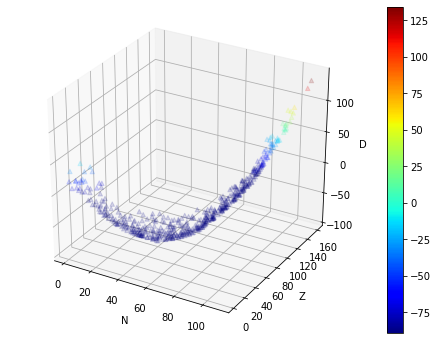

In [23]:
y_new_inverse = y_scaler.inverse_transform(predictions)
x_test_inverse = x_scaler.inverse_transform(X_test)

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = x_test_inverse[:,0]
ys = x_test_inverse[:,1]
zs = y_new_inverse[:,0]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.15)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

In [24]:
X_test_o.shape

(500, 2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 5 columns):
z            2498 non-null int64
n            2498 non-null int64
d            2498 non-null float64
error        2498 non-null float64
estimated    2498 non-null int64
dtypes: float64(2), int64(3)
memory usage: 117.1 KB


In [26]:
test_df = pd.DataFrame(data=X_test_o)
test_df = test_df.rename(columns={ 0: "z", 1: "n" })
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
z    500 non-null int64
n    500 non-null int64
dtypes: int64(2)
memory usage: 7.9 KB


In [27]:
merged_df = pd.merge(df,test_df, on=['z','n'],how="right")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
z            500 non-null int64
n            500 non-null int64
d            500 non-null float64
error        500 non-null float64
estimated    500 non-null int64
dtypes: float64(2), int64(3)
memory usage: 23.4 KB


In [28]:
merged_df.head()

,z,n,d,error,estimated
0,1,3,24.621127,0.100000,0
1,1,5,41.875721,0.254127,0
2,3,3,14.086879,0.000001,0
3,4,7,20.177167,0.000238,0
4,5,6,8.667707,0.000012,0


In [29]:
merged_df['error'] = merged_df['error'].apply(lambda y: y if y > 1 else 1)

In [30]:
error_vals = merged_df['error'].to_numpy().reshape(-1,1)

In [31]:
error_vals.shape

(500, 1)

In [32]:
print(y_new_inverse.shape)
print(y_test_o.shape)
print(error_vals.shape)

(500, 1)
(500, 1)
(500, 1)


In [33]:

diff = np.square((y_new_inverse - y_test_o) / error_vals)
diff_abs = y_new_inverse - y_test_o
print(diff.shape)
print(diff[:5])
reshaped_diff = diff.reshape(-1,1)[:,0]
print(reshaped_diff.shape)
print(reshaped_diff[:5])

(500, 1)
[[15.43449137]
 [ 5.67586393]
 [16.58683837]
 [ 2.19123572]
 [ 0.15820858]]
(500,)
[15.43449137  5.67586393 16.58683837  2.19123572  0.15820858]


In [34]:
diff_df = pd.DataFrame(data={'diff': reshaped_diff})
diff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
diff    500 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [35]:
diff_df.isnull().values.any()

False

In [36]:
diff_df.max()

diff    147.808615
dtype: float64

In [37]:
diff_df.describe()

,diff
count,500.000000
mean,5.040895
std,10.685256
min,0.000010
25%,0.369539
50%,1.624976
75%,5.166713
max,147.808615


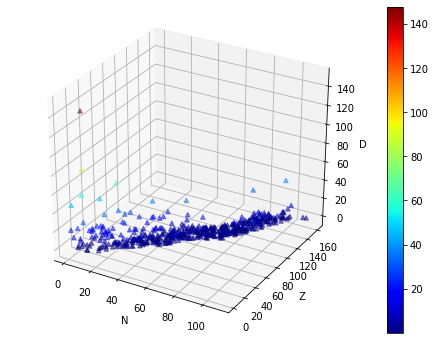

In [38]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = x_test_inverse[:,0]
ys = x_test_inverse[:,1]
zs = diff[:,0]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.5)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

In [39]:
range_x = x_test_inverse.shape[0]
range_x

500

In [40]:
iterate_x = list(range(0,range_x))
len(iterate_x)

500

In [41]:
diff[:,0].shape

(500,)

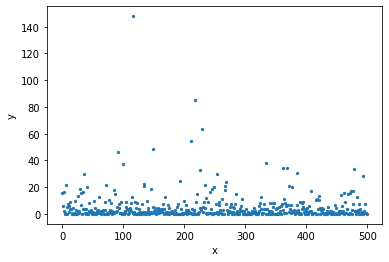

In [42]:
plt.scatter(iterate_x, diff[:,0], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

In [43]:
diff_df.describe()

,diff
count,500.000000
mean,5.040895
std,10.685256
min,0.000010
25%,0.369539
50%,1.624976
75%,5.166713
max,147.808615


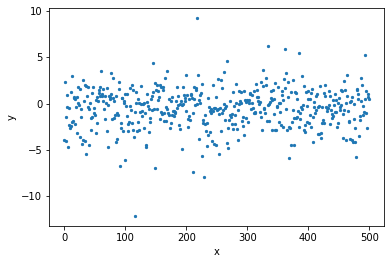

In [44]:
plt.scatter(iterate_x, diff_abs[:,0], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()